In [1]:
import pandas as pd

In [2]:
#Explore results
results_df = pd.read_csv('F1Data/results.csv')[['resultId', 'raceId', 'driverId', 'grid', 'position', 'laps']]

results_df

,resultId,raceId,driverId,grid,position,laps
0,1,18,1,1,1,58
1,2,18,2,5,2,58
2,3,18,3,7,3,58
3,4,18,4,11,4,58
4,5,18,5,3,5,58
...,...,...,...,...,...,...
26514,26520,1132,839,18,16,50
26515,26521,1132,815,0,17,50
26516,26522,1132,855,14,18,50
26517,26523,1132,847,1,\N,33


In [3]:
#Explore lap_times
lap_times_df = pd.read_csv('F1Data/lap_times.csv')

lap_times_df

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


In [4]:
# Load races.csv and keep essential columns
races_df = pd.read_csv('F1Data/races.csv')[['raceId', 'year', 'circuitId', 'date', 'time']]

# Display the resulting DataFrame
races_df

,raceId,year,circuitId,date,time
0,1,2009,1,2009-03-29,06:00:00
1,2,2009,2,2009-04-05,09:00:00
2,3,2009,17,2009-04-19,07:00:00
3,4,2009,3,2009-04-26,12:00:00
4,5,2009,4,2009-05-10,12:00:00
...,...,...,...,...,...
1120,1140,2024,32,2024-10-27,20:00:00
1121,1141,2024,18,2024-11-03,17:00:00
1122,1142,2024,80,2024-11-23,06:00:00
1123,1143,2024,78,2024-12-01,17:00:00


In [5]:
# Load circuits.csv and drop unnecessary columns
circuits_df = pd.read_csv('F1Data/circuits.csv').drop(columns=['url', 'country', 'alt','location'])

# Display the resulting DataFrame
circuits_df

,circuitId,circuitRef,name,lat,lng
0,1,albert_park,Albert Park Grand Prix Circuit,-37.84970,144.96800
1,2,sepang,Sepang International Circuit,2.76083,101.73800
2,3,bahrain,Bahrain International Circuit,26.03250,50.51060
3,4,catalunya,Circuit de Barcelona-Catalunya,41.57000,2.26111
4,5,istanbul,Istanbul Park,40.95170,29.40500
...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,37.22700,-8.62670
73,76,mugello,Autodromo Internazionale del Mugello,43.99750,11.37190
74,77,jeddah,Jeddah Corniche Circuit,21.63190,39.10440
75,78,losail,Losail International Circuit,25.49000,51.45420


In [6]:
#merged the two dataframes together
races_circuits_df = pd.merge(races_df, circuits_df, on='circuitId')
races_circuits_df

,raceId,year,circuitId,date,time,circuitRef,name,lat,lng
0,1,2009,1,2009-03-29,06:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
1,18,2008,1,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
2,36,2007,1,2007-03-18,03:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
3,55,2006,1,2006-04-02,14:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
4,71,2005,1,2005-03-06,14:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
...,...,...,...,...,...,...,...,...,...
1120,1078,2022,79,2022-05-08,19:30:00,miami,Miami International Autodrome,25.9581,-80.2389
1121,1102,2023,79,2023-05-07,19:30:00,miami,Miami International Autodrome,25.9581,-80.2389
1122,1126,2024,79,2024-05-05,20:00:00,miami,Miami International Autodrome,25.9581,-80.2389
1123,1119,2023,80,2023-11-19,06:00:00,vegas,Las Vegas Strip Street Circuit,36.1147,-115.1730


In [7]:
# Merge results_df with races_circuits_df 
merged_df = pd.merge(lap_times_df, races_circuits_df[['raceId','name', 'circuitRef', 'circuitId']], on='raceId')

#output
merged_df

,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId
0,841,20,1,1,1:38.109,98109,Albert Park Grand Prix Circuit,albert_park,1
1,841,20,2,1,1:33.006,93006,Albert Park Grand Prix Circuit,albert_park,1
2,841,20,3,1,1:32.713,92713,Albert Park Grand Prix Circuit,albert_park,1
3,841,20,4,1,1:32.803,92803,Albert Park Grand Prix Circuit,albert_park,1
4,841,20,5,1,1:32.342,92342,Albert Park Grand Prix Circuit,albert_park,1
...,...,...,...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742,Red Bull Ring,red_bull_ring,70
575025,1131,858,66,19,1:10.855,70855,Red Bull Ring,red_bull_ring,70
575026,1131,858,67,19,1:12.454,72454,Red Bull Ring,red_bull_ring,70
575027,1131,858,68,19,1:13.607,73607,Red Bull Ring,red_bull_ring,70


In [8]:
#ALL them merged together
# so i renamed the positoin to finish_position because this is the final lap and not 1st lap.

results_df = results_df.rename(columns={'position': 'finish_position'})

# Merge the results_df with merged_df on 'raceId' and 'driverId'
merged_df = pd.merge(merged_df, results_df, on=['raceId', 'driverId'])

# Drop the 'laps' column which is from results_df
merged_df = merged_df.drop(columns=['laps'])

# Display the resulting DataFrame
merged_df.head()

,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId,resultId,grid,finish_position
0,841,20,1,1,1:38.109,98109,Albert Park Grand Prix Circuit,albert_park,1,20779,1,1
1,841,20,2,1,1:33.006,93006,Albert Park Grand Prix Circuit,albert_park,1,20779,1,1
2,841,20,3,1,1:32.713,92713,Albert Park Grand Prix Circuit,albert_park,1,20779,1,1
3,841,20,4,1,1:32.803,92803,Albert Park Grand Prix Circuit,albert_park,1,20779,1,1
4,841,20,5,1,1:32.342,92342,Albert Park Grand Prix Circuit,albert_park,1,20779,1,1


# NEW RESTRICTED DATAFRAME

In [9]:
trackType = pd.read_csv('F1Data/F1-circuits.csv', encoding='latin1', sep=';')
trackType = trackType[['Circuit', 'Type']]  # Extract only the Circuit and Type columns
trackType_restricted = trackType[trackType['Type'].isin(['Street', 'Road'])]
trackType_restricted

,Circuit,Type
0,Adelaide Street Circuit,Street
1,Ain-Diab Circuit,Road
2,Aintree,Road
3,Albert Park,Street
4,AVUS,Street
6,Circuito da Boavista,Street
8,Circuit Bremgarten,Road
11,Caesars Palace,Street
13,Charade Circuit,Road
15,Detroit street circuit,Street


In [11]:
# Merging the DataFrames on 'name' from races_circuits_df and 'Circuit' from trackType_restricted
restricted_df = pd.merge(merged_df, trackType_restricted, left_on='name', right_on='Circuit', how='inner')

# Show the first few rows of the new restricted_df
restricted_df


,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId,resultId,grid,finish_position,Circuit,Type
0,846,20,1,1,1:24.839,84839,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
1,846,20,2,1,1:20.269,80269,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
2,846,20,3,1,1:19.811,79811,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
3,846,20,4,1,1:19.485,79485,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
4,846,20,5,1,1:19.537,79537,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89046,1113,855,58,12,1:42.795,102795,Marina Bay Street Circuit,marina_bay,15,26137,0,12,Marina Bay Street Circuit,Street
89047,1113,855,59,14,1:43.773,103773,Marina Bay Street Circuit,marina_bay,15,26137,0,12,Marina Bay Street Circuit,Street
89048,1113,855,60,14,1:41.794,101794,Marina Bay Street Circuit,marina_bay,15,26137,0,12,Marina Bay Street Circuit,Street
89049,1113,855,61,13,1:42.010,102010,Marina Bay Street Circuit,marina_bay,15,26137,0,12,Marina Bay Street Circuit,Street


In [12]:
# Filtering for grid position 1,2 (front row), so we can see where their
# finsihing position in the finish_position column
front_row_results = restricted_df[(restricted_df['grid'].isin([1, 2]))]
front_row_results

,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId,resultId,grid,finish_position,Circuit,Type
0,846,20,1,1,1:24.839,84839,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
1,846,20,2,1,1:20.269,80269,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
2,846,20,3,1,1:19.811,79811,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
3,846,20,4,1,1:19.485,79485,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
4,846,20,5,1,1:19.537,79537,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88209,1113,847,57,3,1:37.246,97246,Marina Bay Street Circuit,marina_bay,15,26141,2,16,Marina Bay Street Circuit,Street
88210,1113,847,58,3,1:38.686,98686,Marina Bay Street Circuit,marina_bay,15,26141,2,16,Marina Bay Street Circuit,Street
88211,1113,847,59,3,1:40.239,100239,Marina Bay Street Circuit,marina_bay,15,26141,2,16,Marina Bay Street Circuit,Street
88212,1113,847,60,3,1:39.510,99510,Marina Bay Street Circuit,marina_bay,15,26141,2,16,Marina Bay Street Circuit,Street


In [13]:
# Filtering for grid position 1,2 (front row) AND people who won('finish_position') ; AND  lap 1 AND lap1 position
front_row_winners = restricted_df[(restricted_df['grid'].isin([1, 2])) & (restricted_df['finish_position'] == '1') & (restricted_df['lap'] == 1) & (restricted_df['position'] == 1) ]
front_row_winners.head()

,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId,resultId,grid,finish_position,Circuit,Type
0,846,20,1,1,1:24.839,84839,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
1604,865,17,1,1,1:27.880,87880,Circuit de Monaco,monaco,6,21352,1,1,Circuit de Monaco,Street
3050,885,3,1,1,1:28.220,88220,Circuit de Monaco,monaco,6,21822,1,1,Circuit de Monaco,Street
4553,905,3,1,1,1:41.206,101206,Circuit de Monaco,monaco,6,22240,1,1,Circuit de Monaco,Street
8100,211,30,1,1,1:58.788,118788,Circuit de Monaco,monaco,6,4095,2,1,Circuit de Monaco,Street


In [14]:
# Front row winners (grid 1 or 2, finish position 1, lap 1, and position 1)
front_row_winners = restricted_df[(restricted_df['grid'].isin([1, 2])) & 
                                  (restricted_df['finish_position'] == '1') & 
                                  (restricted_df['lap'] == 1) & 
                                  (restricted_df['position'] == 1)]

# Non-front row winners (not grid 1 or 2, finish position 1, lap 1, and position 1)
non_front_row_winners = restricted_df[(~restricted_df['grid'].isin([1, 2])) & 
                                      (restricted_df['finish_position'] == '1') & 
                                      (restricted_df['lap'] == 1) & 
                                      (restricted_df['position'] == 1)]


In [16]:
# Display both sets
front_row_winners.head()

,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId,resultId,grid,finish_position,Circuit,Type
0,846,20,1,1,1:24.839,84839,Circuit de Monaco,monaco,6,20897,1,1,Circuit de Monaco,Street
1604,865,17,1,1,1:27.880,87880,Circuit de Monaco,monaco,6,21352,1,1,Circuit de Monaco,Street
3050,885,3,1,1,1:28.220,88220,Circuit de Monaco,monaco,6,21822,1,1,Circuit de Monaco,Street
4553,905,3,1,1,1:41.206,101206,Circuit de Monaco,monaco,6,22240,1,1,Circuit de Monaco,Street
8100,211,30,1,1,1:58.788,118788,Circuit de Monaco,monaco,6,4095,2,1,Circuit de Monaco,Street


In [17]:
non_front_row_winners

,raceId,driverId,lap,position,time,milliseconds,name,circuitRef,circuitId,resultId,grid,finish_position,Circuit,Type
84104,982,1,1,1,2:59.371,179371,Marina Bay Street Circuit,marina_bay,15,23642,5,1,Marina Bay Street Circuit,Street


/var/folders/r3/qmn2tszd75q342qvbdj0hp600000gn/T/ipykernel_59360/1969650281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_row_winners['Start'] = 'Front Row (1 or 2)'
/var/folders/r3/qmn2tszd75q342qvbdj0hp600000gn/T/ipykernel_59360/1969650281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_front_row_winners['Start'] = 'Non-Front Row'


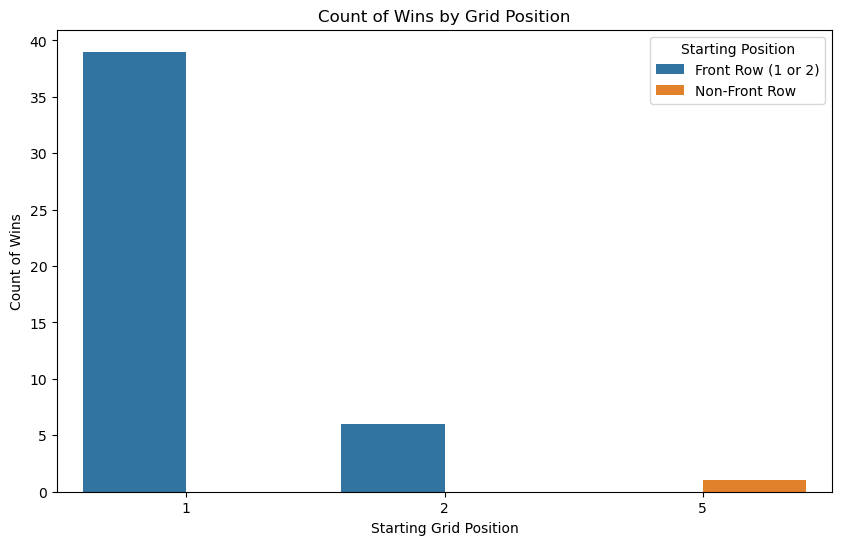

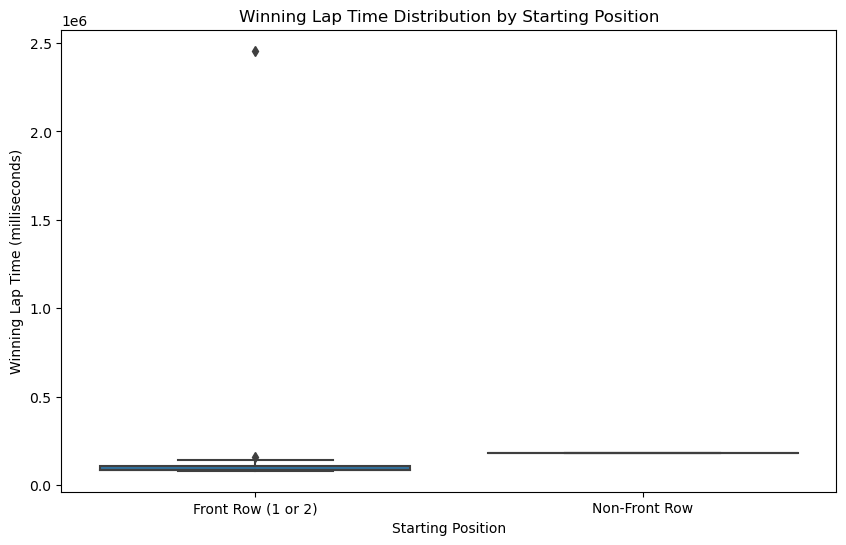

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


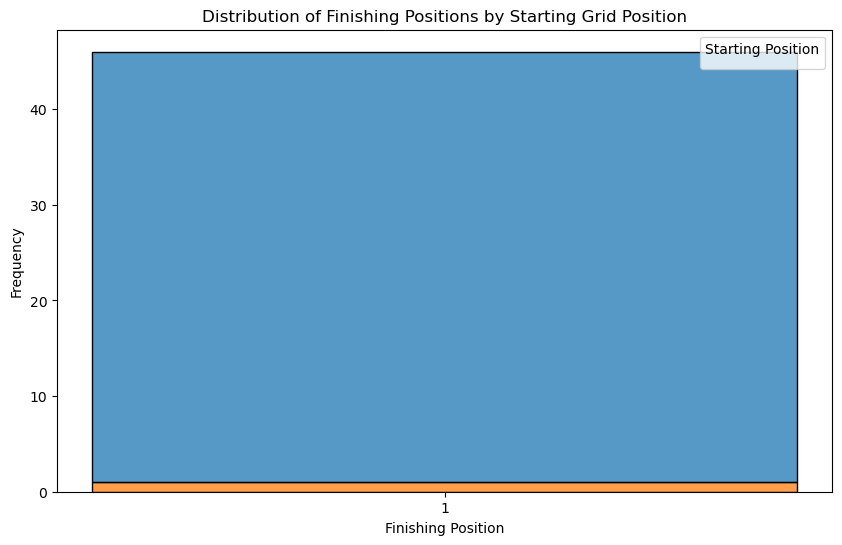

In [18]:
#chatgpt obviously
import matplotlib.pyplot as plt
import seaborn as sns

# Combine both datasets and add a column to identify front row or not
front_row_winners['Start'] = 'Front Row (1 or 2)'
non_front_row_winners['Start'] = 'Non-Front Row'
combined_df = pd.concat([front_row_winners, non_front_row_winners])

# 1. Bar Plot - Count of Wins by Grid Position
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='grid', hue='Start')
plt.title('Count of Wins by Grid Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Count of Wins')
plt.legend(title='Starting Position')
plt.show()

# 2. Box Plot - Winning Times by Grid Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Start', y='milliseconds')
plt.title('Winning Lap Time Distribution by Starting Position')
plt.xlabel('Starting Position')
plt.ylabel('Winning Lap Time (milliseconds)')
plt.show()

# 3. Histogram - Finishing Position for Front Row vs. Non-Front Row
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='finish_position', hue='Start', multiple='stack', bins=10)
plt.title('Distribution of Finishing Positions by Starting Grid Position')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.legend(title='Starting Position')
plt.show()